Hello !

This week my team and I decided to create a github project to track our work.
https://github.com/jjsalomon/carotid_ultrasound_boundary_detection

Git/github is a version control framework and using git will just ensure that we can work harmoniously together on the same code base.

This week I looked at doing some experiments for the carotid project, Im taking all of my methods from class and will be looking at Adaptive Thresholding

The first thing that i've done is turned the image into grayscale

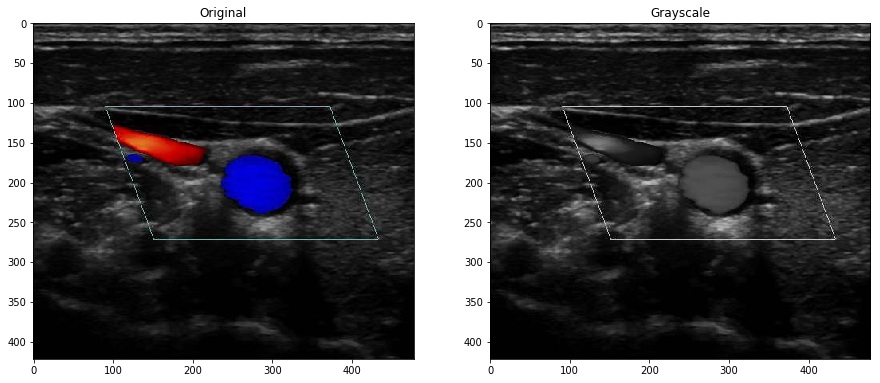

In [37]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read in carotid image
carotid_img = cv2.imread("Carotid.jpg")
grayscale = cv2.cvtColor(carotid_img, cv2.COLOR_BGR2GRAY)

# Show Images
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(2,2,1)
imgplot = plt.imshow(carotid_img)
ax1.set_title("Original")

ax2 = fig.add_subplot(222)
imgplot2 = plt.imshow(grayscale,cmap='gray')
ax2.set_title("Grayscale")
plt.show()

Grayscale will allow us to further segment the images. I wanted to try experimenting using Adaptive Thresholding to see some results.

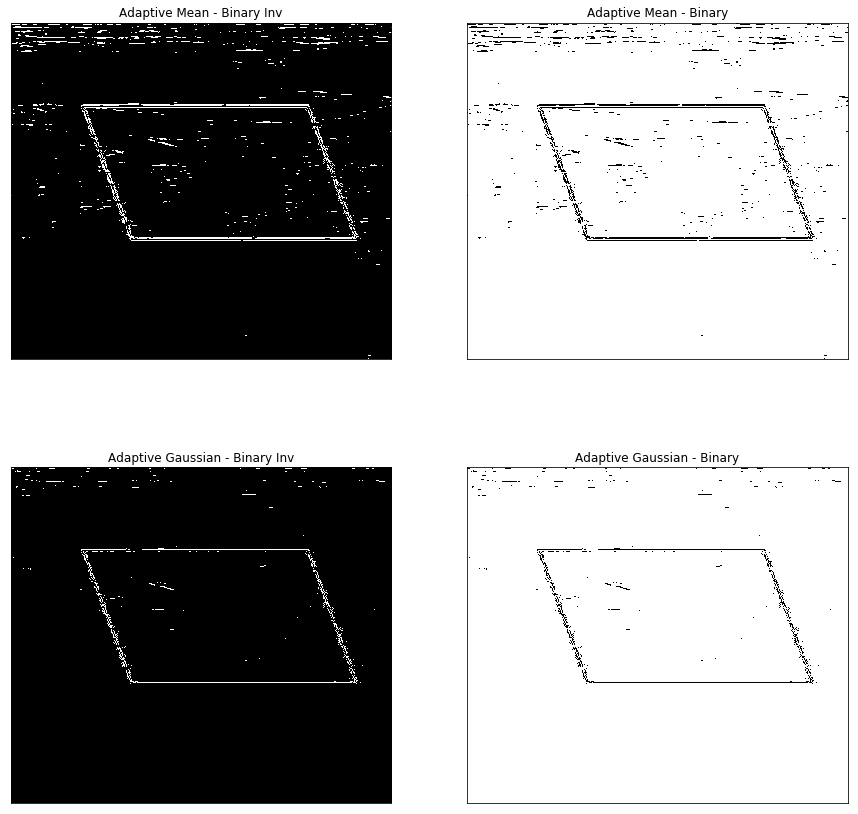

In [57]:
# Adaptive Thresholding
B1 = cv2.adaptiveThreshold(grayscale, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType = cv2.THRESH_BINARY_INV, blockSize = 5,C = 15)
B2 = cv2.adaptiveThreshold(grayscale, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 5,C = 15)
B3 = cv2.adaptiveThreshold(grayscale, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType = cv2.THRESH_BINARY_INV, blockSize = 5,C = 15)
B4 = cv2.adaptiveThreshold(grayscale, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 5,C = 15)

# Storing images
images = [B1,B2,B3,B4]
# Titles
titles = ["Adaptive Mean - Binary Inv","Adaptive Mean - Binary","Adaptive Gaussian - Binary Inv","Adaptive Gaussian - Binary"]
# Show Images

# Display results
fig = plt.figure(figsize=(15,15))
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

The results didnt really produce much valuable insights....Adaptive mean seems to produce more detail....i decided to then change the values on C parameter...from 15 to 5

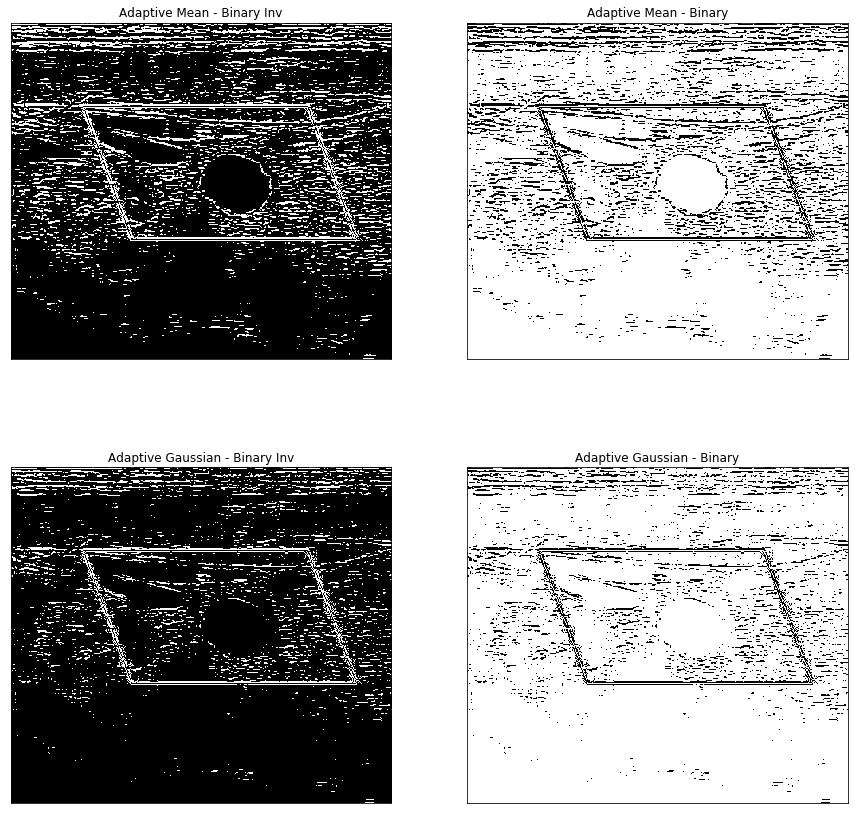

In [61]:
# Adaptive Thresholding
B1 = cv2.adaptiveThreshold(grayscale, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType = cv2.THRESH_BINARY_INV, blockSize = 5,C = 5)
B2 = cv2.adaptiveThreshold(grayscale, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 5,C = 5)
B3 = cv2.adaptiveThreshold(grayscale, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType = cv2.THRESH_BINARY_INV, blockSize = 5,C = 5)
B4 = cv2.adaptiveThreshold(grayscale, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 5,C = 5)

# Storing images
images = [B1,B2,B3,B4]
# Titles
titles = ["Adaptive Mean - Binary Inv","Adaptive Mean - Binary","Adaptive Gaussian - Binary Inv","Adaptive Gaussian - Binary"]
# Show Images

# Display results
fig = plt.figure(figsize=(15,15))
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

This resulted in more detail in the images.